## Simulacion de PID rover autonomo

Utilizando python jupyter, numpy y matplotlib realizamos la simulación del voltaje (u) respecto a la distancia y un dx 
para manejar la potencia de los motores para control de movimiento mediante ecuaciones diferenciales respecto a e(t)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

In [2]:
def posicion(k, h, u):
    return k + h*(-u)

In [3]:
def voltaje(e):
    return -10*e

### Calculo del Error respecto al tiempo

Utilizando los parametros antes mencionados y sabiendo que e = r - x; con x siendo una función de t, tenemos entonces que 
e(t) = r - x(t), en base a la ecuacion dicha del error podemos calcular respecto al tiempo en segundos del orden de 10**-3 ya que el tiempo entre casa frame son unos cuantos milisegundos despreciables para efectos de esta simulacion.

Utilizando unicamente parametros de tiempo se puede apreciar que el valor absoluto del error decrece de manera exponencial inversa conforme lo hace el tiempo

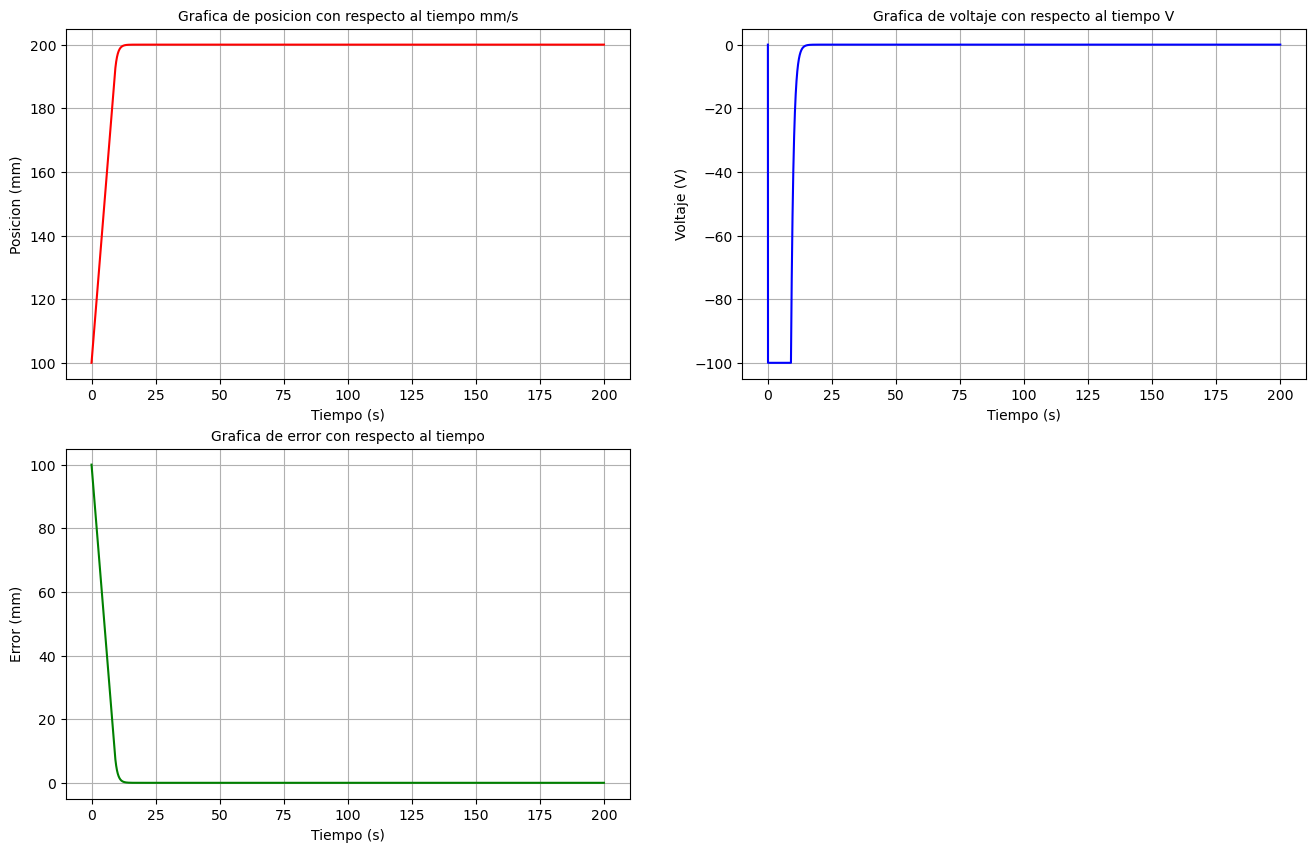

In [4]:
# Creamos un array de distancias simuladas en mm 
x = []
u = []
e = []
x.append(100)
u.append(0)

e.append(200-x[0])

Umax = 100

for i in range(1, 200000):
    
    E = 200-x[i-1]
    
    e.append(E)
    V = voltaje(E)
    
    #Establecemos un rango de trabajo con el voltaje maximo de trabajo de nuestros motores
    if V < Umax and V > -Umax:
        u.append(V)
    elif V > Umax:
        u.append(Umax)
    elif V < -Umax:
        u.append(-Umax)
        
    x.append( posicion( x[i-1], 0.0001, u[-1] ) )
    
        

# print(x)
t = np.array([i*10**(-3) for i in range(0, 200000) ])

plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Grafica de posicion con respecto al tiempo mm/s", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posicion (mm)")
plt.plot(t, x, 'r')

plt.subplot(2,2, 2)
plt.grid(True)
plt.title("Grafica de voltaje con respecto al tiempo V", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.plot(t, u, 'b')

plt.subplot(2,2,3)
plt.grid(True)
plt.title("Grafica de error con respecto al tiempo", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Error (mm)")
plt.plot(t, e, 'g')
#plt.plot(exp, 'r')
